In [370]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

datapath = 'ex4data1.mat'
data = scipy.io.loadmat(datapath)
X = data['X']
y = data['y'].ravel()
print(X.shape)
print(y.shape)

(5000, 400)
(5000,)


In [371]:
# index = np.where(y == 10)[0]
# y[index] = 0

In [372]:
ids = np.random.permutation(range(X.shape[0]))
num_train = 4500
X_train = X[ids[:num_train]]
y_train = y[ids[:num_train]]
X_test = X[ids[num_train:]]
y_test = y[ids[num_train:]]
print(X_train.shape)
print(X_test.shape)

(4500, 400)
(500, 400)


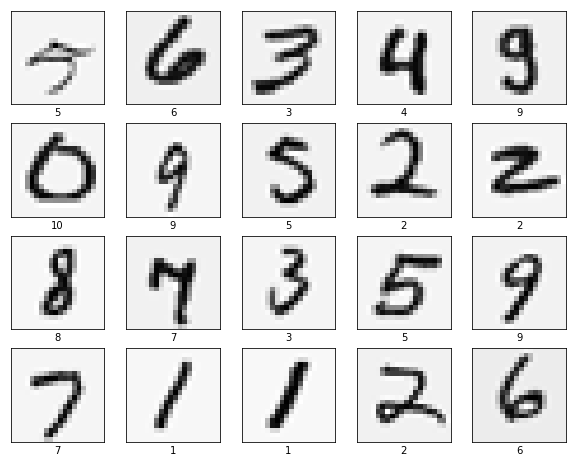

In [373]:
fig = plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
#     plt.grid('off')
    plt.imshow(X_train[i].reshape(20, 20).T, cmap=plt.cm.gray_r)
    plt.xlabel(y_train[i])

In [374]:
weightpath = 'ex4weights.mat'
weights = scipy.io.loadmat(weightpath)
# print(weights)
theta1 = weights['Theta1']
theta2 = weights['Theta2']
print(theta1.shape)
print(theta2.shape)

(25, 401)
(10, 26)


In [375]:
def addones(x):
    return np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)

In [376]:
# a = np.array([1,2,3])
# a[y[0]]
# b = np.array([2,3,1])
# b[a[y[0]]]

In [377]:
num_train = 5000
num_class = 10

In [378]:
y_target = np.zeros((num_train, num_class))
y_target[range(num_train), y - 1] = 1
print(y_target.shape)

(5000, 10)


In [379]:
# def h(theta, x):
#     return 1 / (1+np.exp(-np.dot(x, theta)))
def sigmoid(z):
    return 1 / (1+np.exp(-z))

def feedfw(theta1, theta2, x):
    x = addones(x) #4500x401
    z1 = np.dot(x, theta1.T) #4500x25
#     print(z1.shape)
    a1 = sigmoid(z1)
    a1 = addones(a1) #4500x26
    z2 = np.dot(a1, theta2.T) #4500x10
#     print(z2.shape)
    a2 = sigmoid(z2)
#     print(a2.shape)
    return x, z1, a1, z2, a2

def cost(y_pred, y_target):
    return np.sum(-y_target*np.log(y_pred)-(1-y_target)*np.log(1-y_pred)) / num_train

def cost_regu(y_pred, y_target, theta1, theta2):
    return np.sum(-y_target*np.log(y_pred)-(1-y_target)*np.log(1-y_pred)) / num_train + \
            (np.sum(theta1**2)+np.sum(theta2**2)-np.sum(theta1[:,0]**2)-np.sum(theta2[:,0]**2)) / (2*num_train)

In [380]:
def backprob(y_pred, y_target, x, z1, a1, z2, a2, theta1, theta2):
    da2 = 1
    dz2 = a2 - y_target #1x10
    dtheta22 = np.dot(dz2.T, a1) #10x26
    da1 = np.dot(dz2, theta2) #1x26
    da1 = da1[1:]
    dz1 = np.dot(da1, a1*(1-a1)) #1x25
    dtheta1 = np.dot(dz1.T, x) #25x401
    
    theta1 -= lr*dtheta1
    theta2 -= lr*dtheta2
    
    return theta1, theta2
    

In [381]:
x, z1, a1, z2, a2 = feedfw(theta1, theta2, X)
print(cost_regu(a2, y_target, theta1, theta2))
print(a2[0])
print(y[0])
print(y_target[0])

0.38376985909092365
[1.12661530e-04 1.74127856e-03 2.52696959e-03 1.84032321e-05
 9.36263860e-03 3.99270267e-03 5.51517524e-03 4.01468105e-04
 6.48072305e-03 9.95734012e-01]
10
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [382]:
lr = .01
ite = 1000


In [383]:
for it in range(ite):
    x, z1, a1, z2, a2 = feedfw(theta1, theta2, X)
    theta1, theta2 = backprob(a2, y_target, x, z1, a1, z2, a2, theta1, theta2)



ValueError: shapes (4999,26) and (5000,26) not aligned: 26 (dim 1) != 5000 (dim 0)

In [ ]:
test[range(0, 3), y[:3] - 1]

In [ ]:
def backprob(theta1, theta2, x, y):
    #feed fw
    for it in range(ite):
        